In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\raman'

In [3]:
os.chdir(r'graph_decay')

In [4]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [5]:
def biexp(t, a1, a2, tau1, tau2):
    return a1* (np.exp(-t/tau1)) + a2* (np.exp(-t/tau2))

In [6]:
def monoexp(t, a, tau):
    return a* np.exp(-t/tau)

In [20]:
def plotf(x,y,z):
    fn = z.split('\\')
    fn1 = fn[3].split('.')
    p0 = (10, 10, 0.08, 0.2)
    params, cv = scipy.optimize.curve_fit(biexp,x, y, p0, maxfev = 10000)
    a1, a2, tau1, tau2 = params
    plt.plot(x, y, '.', label="data")
    plt.plot(x, biexp(x, a1, a2, tau1, tau2), '--', label = fn1[0])
    
    plt.title("Fitted BiExponential Curve")
    plt.ylabel('Intensity(a.u)')
    plt.xlabel('t(ms)')
    plt.legend()
    plt.show()
    tau1 = '%.4f'%tau1
    tau2 = '%.4f'%tau2
    print(f"{a1} * e^(-t/{tau1}) + {a2} * e^(-t/{tau2})")
    print(p0)

    
    with open(f't2_time3.txt', 'a') as f:
        f.write(f'{fn1[0]}&{tau1}&{tau2}\\\ \hline \n')

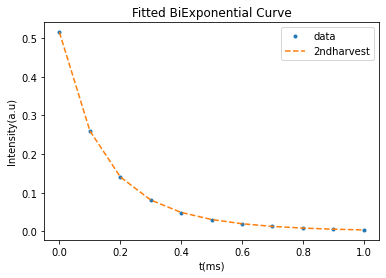

0.3016015784345812 * e^(-t/0.1067) + 0.2137785298606045 * e^(-t/0.2452)
(10, 10, 0.08, 0.2)


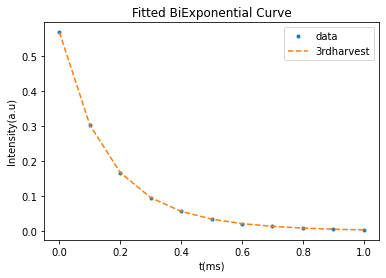

0.40006313107777514 * e^(-t/0.1322) + 0.16801043791160608 * e^(-t/0.2681)
(10, 10, 0.08, 0.2)


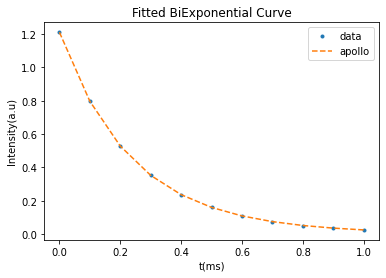

0.7654380772120803 * e^(-t/0.2069) + 0.44580132272219264 * e^(-t/0.3159)
(10, 10, 0.08, 0.2)


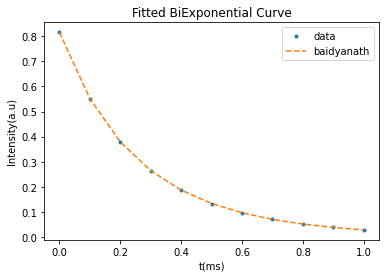

0.3906303267011526 * e^(-t/0.1879) + 0.42463657110217723 * e^(-t/0.3619)
(10, 10, 0.08, 0.2)


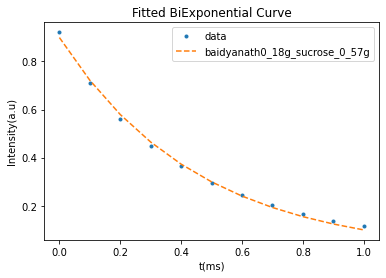

2.1022527937535886 * e^(-t/0.4546) + -1.203160285731965 * e^(-t/0.4546)
(10, 10, 0.08, 0.2)


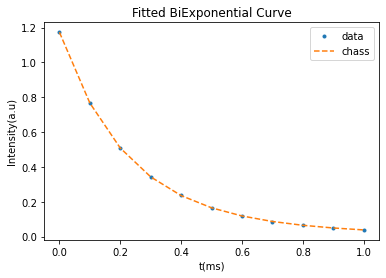

0.9842821666856914 * e^(-t/0.2086) + 0.18907456577869172 * e^(-t/0.5469)
(10, 10, 0.08, 0.2)


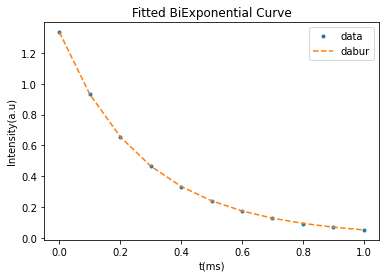

0.6610054017450453 * e^(-t/0.2179) + 0.6735487665536615 * e^(-t/0.3693)
(10, 10, 0.08, 0.2)


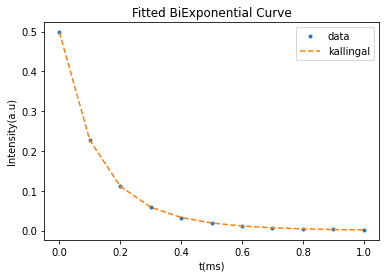

0.3149226899806392 * e^(-t/0.0968) + 0.1835317828204736 * e^(-t/0.2117)
(10, 10, 0.08, 0.2)


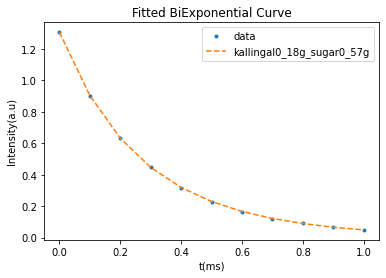

0.6102164716333474 * e^(-t/0.2060) + 0.6953719730426795 * e^(-t/0.3632)
(10, 10, 0.08, 0.2)


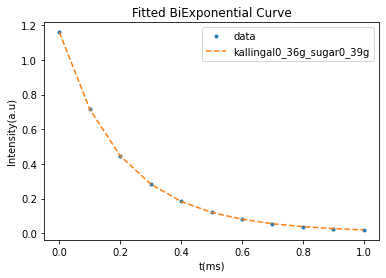

0.9232285700852053 * e^(-t/0.1831) + 0.2356859511545763 * e^(-t/0.3667)
(10, 10, 0.08, 0.2)


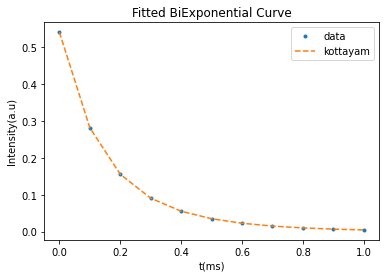

0.3290242222898253 * e^(-t/0.1147) + 0.21205276764779124 * e^(-t/0.2587)
(10, 10, 0.08, 0.2)


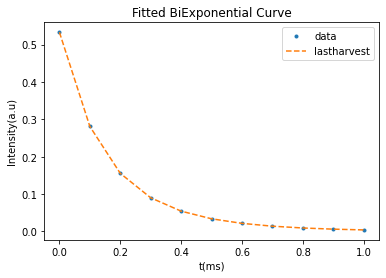

0.3269869193731022 * e^(-t/0.1198) + 0.20614654805729876 * e^(-t/0.2542)
(10, 10, 0.08, 0.2)


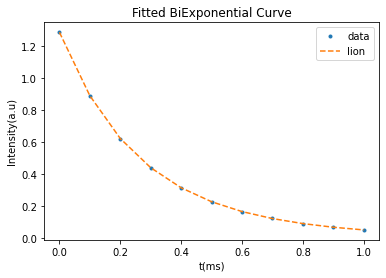

0.7598995507580284 * e^(-t/0.2174) + 0.5241793299243483 * e^(-t/0.4002)
(10, 10, 0.08, 0.2)


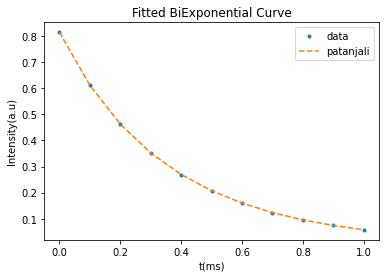

0.6718179591308371 * e^(-t/0.4056) + 0.14192756317766783 * e^(-t/0.1991)
(10, 10, 0.08, 0.2)


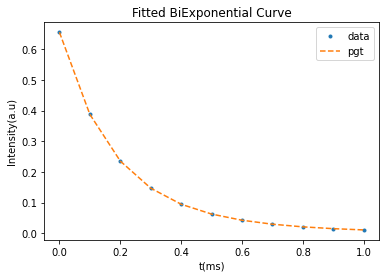

0.4806906542157186 * e^(-t/0.1591) + 0.1742997169297241 * e^(-t/0.3500)
(10, 10, 0.08, 0.2)


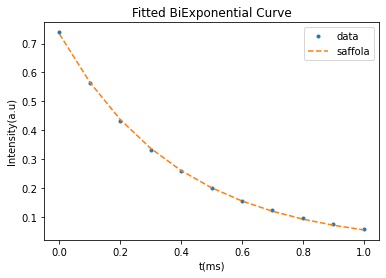

0.7803712756713105 * e^(-t/0.3864) + -0.04741132410378242 * e^(-t/0.3864)
(10, 10, 0.08, 0.2)


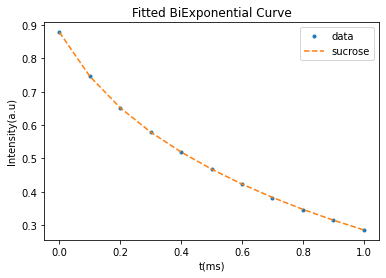

0.7551212272529995 * e^(-t/1.0274) + 0.12349506431439682 * e^(-t/0.1422)
(10, 10, 0.08, 0.2)


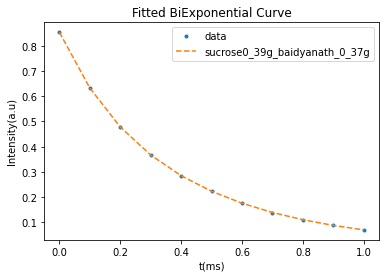

0.20317543940038021 * e^(-t/0.1688) + 0.6502418125357801 * e^(-t/0.4472)
(10, 10, 0.08, 0.2)


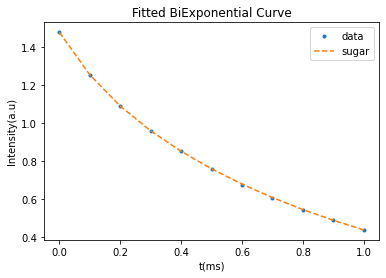

0.1802104651255424 * e^(-t/0.1441) + 1.295932162336076 * e^(-t/0.9245)
(10, 10, 0.08, 0.2)


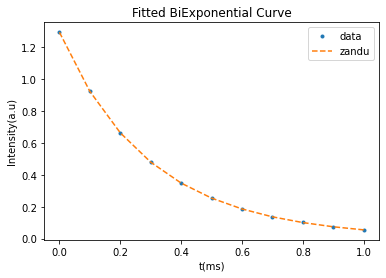

0.29476159333125435 * e^(-t/0.1994) + 0.9972782419827589 * e^(-t/0.3405)
(10, 10, 0.08, 0.2)
count: 20


In [21]:
path = r'graph_decay' # use your path
all_files = glob.glob(path + "/*.csv")
l = 0

for filename in all_files:
    
    df = pd.read_csv(filename, index_col=None, header=0, comment ='#' ,skip_blank_lines='True')
    #print(df.head(1))
    df.columns = ['x', 'isum', 'exponentialfit1', 'integral1', 'exponentialfit2', 'fdmax', 'exponentialfit3','tdmax', 'exponentialfit4']
    l = l+1
    m = df.x
    n = df.isum
    z = filename
    plotf(m,n,z)
    


    
print("count:",l)